### Image Classification

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import pickle

In [2]:
!pip3 install opencv-python

In [3]:
import cv2

In [4]:
DIRECTORY= r'C:\Users\RAMAKANT MISHRA\Desktop\Mini Project\Mini project 5\dogcat\train'
CATEGORIES = ['cats', 'dogs']

In [5]:
IMG_SIZE = 100

data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])

In [6]:
len(data)

25000

In [7]:
random.shuffle(data)

In [8]:
data[0]

[array([[[205, 217, 221],
         [205, 217, 221],
         [203, 215, 219],
         ...,
         [182, 201, 206],
         [179, 198, 203],
         [178, 197, 200]],
 
        [[205, 217, 221],
         [205, 217, 221],
         [203, 215, 219],
         ...,
         [182, 201, 206],
         [179, 198, 203],
         [173, 192, 195]],
 
        [[204, 216, 220],
         [204, 216, 220],
         [205, 217, 221],
         ...,
         [179, 198, 203],
         [178, 197, 202],
         [180, 199, 202]],
 
        ...,
 
        [[121, 116, 107],
         [ 62,  70,  59],
         [ 89,  72,  65],
         ...,
         [ 87,  71,  59],
         [127, 106,  91],
         [106,  85,  70]],
 
        [[ 95,  81,  71],
         [116, 110, 107],
         [107,  98,  94],
         ...,
         [104,  82,  67],
         [ 85,  68,  55],
         [119,  96,  88]],
 
        [[ 92,  70,  62],
         [ 98,  84,  82],
         [ 90,  74,  71],
         ...,
         [100,  77,  62],
  

In [9]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [10]:
X = np.array(X)
y = np.array(y)

In [11]:
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [12]:
X = pickle.load(open('X.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

In [13]:
X = X/255

In [14]:
X.shape

(25000, 100, 100, 3)

In [15]:
pip install --upgrade pip

In [16]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\ramakant mishra\anaconda3\lib\site-packages (2.11.0)



In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [46]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))


In [20]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X, y, epochs=5, validation_split=0.1)

Epoch 1/5
704/704 [==============================] - 2666s 4s/step - loss: 0.6404 - accuracy: 0.6328 - val_loss: 0.5747 - val_accuracy: 0.6992
Epoch 2/5
704/704 [==============================] - 1621s 2s/step - loss: 0.5070 - accuracy: 0.7536 - val_loss: 0.5129 - val_accuracy: 0.7424
Epoch 3/5
704/704 [==============================] - 1488s 2s/step - loss: 0.4172 - accuracy: 0.8055 - val_loss: 0.4922 - val_accuracy: 0.7724
Epoch 4/5
704/704 [==============================] - 1512s 2s/step - loss: 0.3044 - accuracy: 0.8680 - val_loss: 0.5023 - val_accuracy: 0.7716
Epoch 5/5
704/704 [==============================] - 2315s 3s/step - loss: 0.1714 - accuracy: 0.9327 - val_loss: 0.6857 - val_accuracy: 0.7652


In [40]:
test_img = cv2.imread(r'C:\Users\RAMAKANT MISHRA\Desktop\Mini Project\Mini project 5\dogcat\train\dogs\dog.19.jpg')

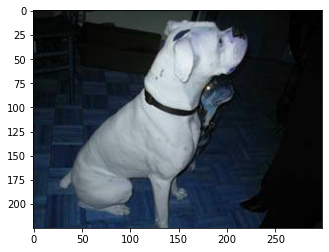

In [41]:
plt.imshow(test_img)

In [42]:
test_img.shape

(225, 299, 3)

In [43]:
test_img = cv2.resize(test_img,(256,256))

In [44]:
test_input = test_img.reshape((1,256,256,3))

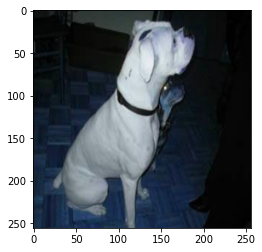

In [45]:
plt.imshow(test_img)

In [55]:
test_img_3 = cv2.imread(r'C:\Users\RAMAKANT MISHRA\Desktop\Mini Project\Mini project 5\dogcat\train\cats\cat.31.jpg')

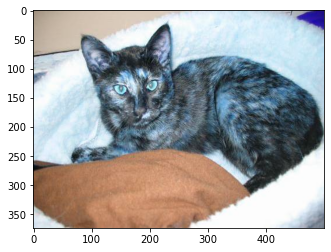

In [56]:
plt.imshow(test_img_3)

In [57]:
test_img_3.shape

(374, 500, 3)

In [58]:
test_img_3 = cv2.resize(test_img_3,(300,300))

In [59]:
test_input = test_img_3.reshape((1,300,300,3))

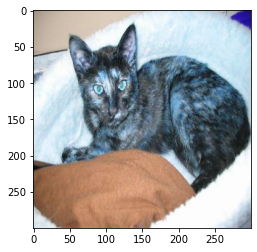

In [60]:
plt.imshow(test_img_3)